<a href="https://colab.research.google.com/github/joeyave/ai-project1/blob/main/ai_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

titanic_file_path = '/content/drive/My Drive/Colab Notebooks/titanic-data.csv'
titanic_df = pd.read_csv(titanic_file_path)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.525882,0.632290,-0.522521,-0.627216,S
1,1,1,female,0.577651,0.632290,-0.522521,1.152747,C
2,1,3,female,-0.249998,-0.554549,-0.522521,-0.608453,S
3,1,1,female,0.370738,0.632290,-0.522521,0.647297,S
4,0,3,male,0.370738,-0.554549,-0.522521,-0.604978,S
...,...,...,...,...,...,...,...,...
682,0,3,male,-0.318969,-0.554549,-0.522521,-0.632776,S
683,0,2,male,-0.181028,-0.554549,-0.522521,-0.467381,S
684,1,1,female,-0.732794,-0.554549,-0.522521,0.005176,S
685,1,1,male,-0.249998,-0.554549,-0.522521,0.005176,C


In [ ]:
import tensorflow as tf

def df_to_ds(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop("Survived")
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
from tensorflow import feature_column

feature_columns = []
for feature_name in ["Age", "Fare", "SibSp", "Parch"]:
  numeric_column = feature_column.numeric_column(feature_name)
  feature_columns.append(numeric_column)

for feature_name in ["Sex", "Embarked", "Pclass"]:
  vocabulary = titanic_df[feature_name].unique()
  categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)
  one_hot = feature_column.indicator_column(categorical_column)
  feature_columns.append(one_hot)

In [ ]:
list(feature_columns)

[NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Embarked', vocabulary_list=('S', 'C', 'Q'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(3, 1, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0))]

In [ ]:
from sklearn.model_selection import train_test_split

train_validation_df, test_df = train_test_split(titanic_df, test_size=0.15)
train_df, validation_df = train_test_split(train_validation_df, test_size=0.15)

In [ ]:
batch_size = 32
train_ds = df_to_ds(train_df, batch_size=batch_size)
test_ds = df_to_ds(test_df, shuffle=True, batch_size=batch_size)
validation_ds = df_to_ds(validation_df, shuffle=True, batch_size=batch_size)

In [ ]:
import matplotlib.pyplot as plt

# We use a loss function to determine how far the predicted values deviate from the actual values in the training data.

def plot_accuracy_loss_graph(history):
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  # An epoch is a full iteration over samples. The number of epochs is how many times the algorithm is going to run.
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs = range(len(accuracy))

  plt.plot(epochs, accuracy, label="Train accuracy")
  plt.plot(epochs, val_accuracy, label = "Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend(loc="lower left")
  plt.figure()

  plt.plot(epochs, loss, label="Train loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.legend(loc="lower left")
  plt.title("Training and validation loss")

In [ ]:
from zipfile import ZipFile

def get_all_file_paths(directory):
    file_paths = []
    for root, directories, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)
    return file_paths        
  
def zip_directory(directory):  
    file_paths = get_all_file_paths(directory)
    with ZipFile(f'{directory}.zip','w') as zip:
        for file in file_paths:
            zip.write(file)

# Чекпоинты

In [ ]:
checkpoint_path = "some-checkpoints/cp-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=0, 
    save_weights_only=True,
    save_freq='epoch')

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.8558


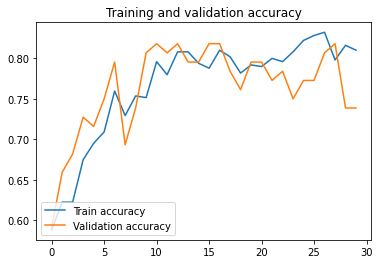

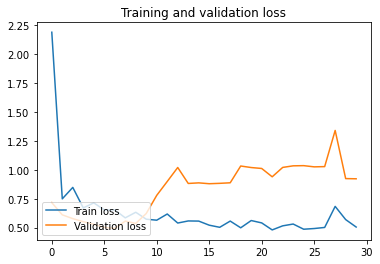

In [ ]:
import os
from tensorflow.keras import layers
import shutil

checkpoints_dir = "some-checkpoints"
if os.path.isdir(checkpoints_dir): 
  shutil.rmtree(checkpoints_dir)

# A dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.
# The activation function is a function that is used for the transformation of the input values of neurons. Basically, it introduces the non-linearity into the networks of neural networks so that the networks can learn the relationship between the input and output values.

model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(50, activation='relu'),
  layers.Dense(30, activation='relu'),
  layers.Dense(20, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0, callbacks=[cp_callback])

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.4539 - accuracy: 0.7885


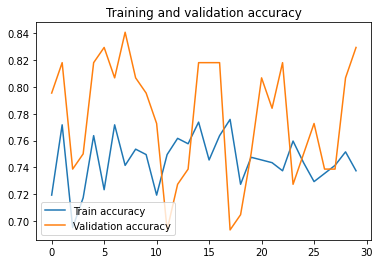

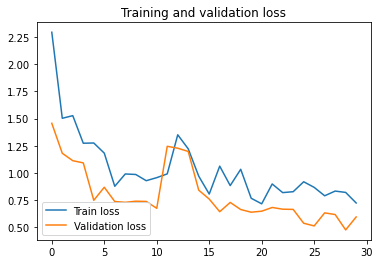

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(50, activation='elu'),
  layers.Dense(30, activation='elu'),
  layers.Dense(20, activation='elu'),
  layers.Dropout(0.2),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.4906 - accuracy: 0.7981


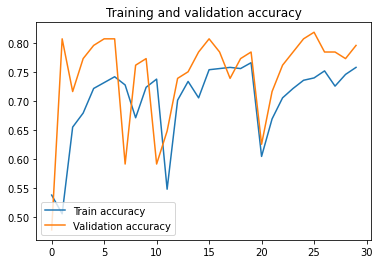

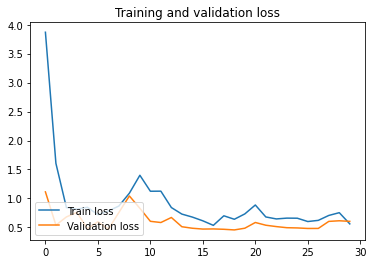

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(50, activation='tanh'),
  layers.Dense(30, activation='tanh'),
  layers.Dense(20, activation='tanh'),
  layers.Dropout(0.2),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.5251 - accuracy: 0.8365


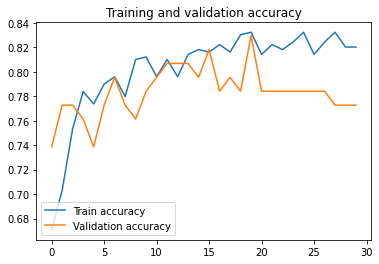

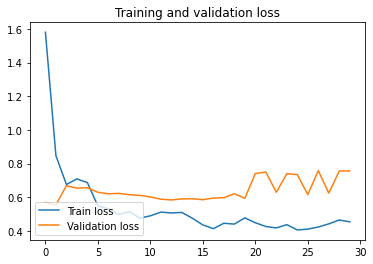

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(50, activation='relu'),
  layers.Dense(20, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.5458 - accuracy: 0.8462


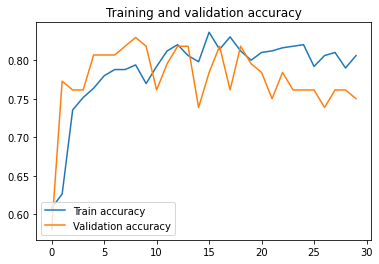

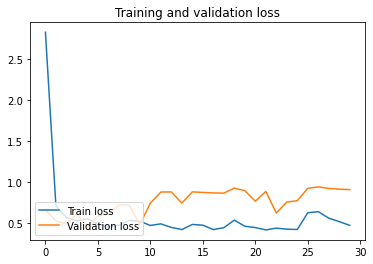

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(70, activation='relu'),
  layers.Dense(40, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

# Learning rate

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.5002 - accuracy: 0.8942


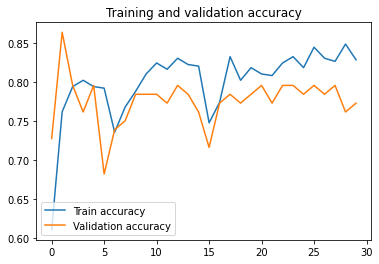

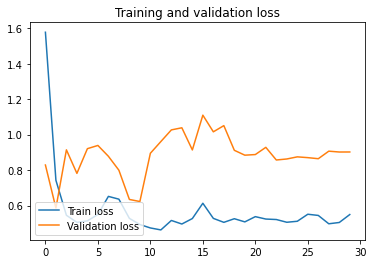

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(50, activation='relu'),
  layers.Dense(20, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

# Переобучение

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.6369 - accuracy: 0.8462


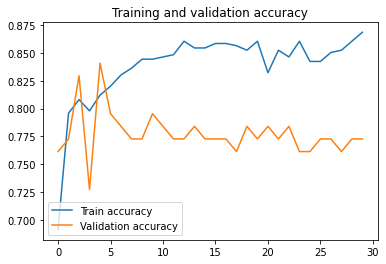

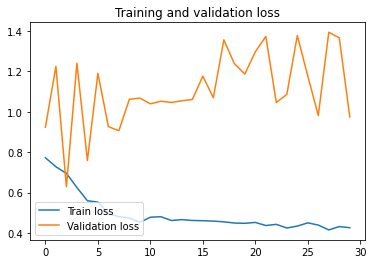

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(250, activation='relu'),
  layers.Dense(150, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=30,
                    verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.8899 - accuracy: 0.8173


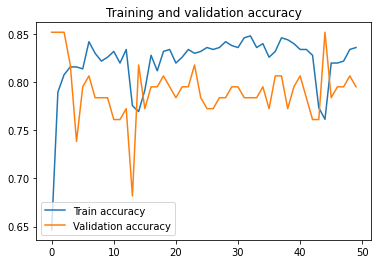

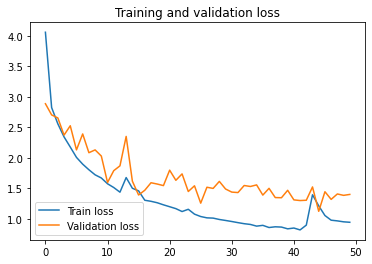

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(250, activation='relu',
                kernel_regularizer=tf.keras.regularizers.L1(0.001),
                activity_regularizer=tf.keras.regularizers.L2(0.001)
                ),
  layers.Dense(150, activation='relu',
                kernel_regularizer=tf.keras.regularizers.L1(0.001),
                activity_regularizer=tf.keras.regularizers.L2(0.001)
                ),
  layers.Dropout(0.1),
  layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=50,
                    verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

# Разные optimiser


Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.5156 - accuracy: 0.8462


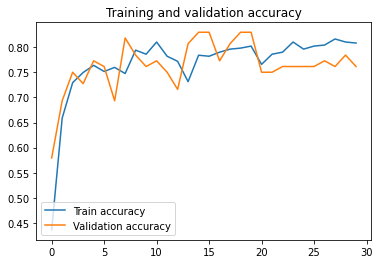

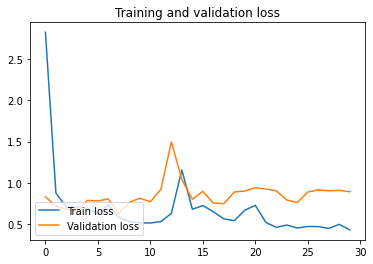

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(60, activation='relu'),
  layers.Dense(30, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(1)
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 5.9327 - accuracy: 0.6154


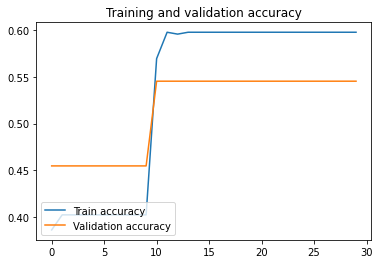

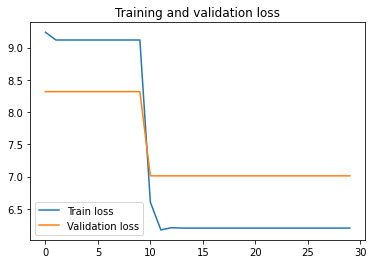

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(60, activation='relu'),
  layers.Dense(30, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(nesterov=True, learning_rate=0.6),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.5172 - accuracy: 0.7788


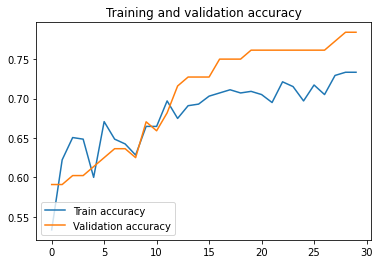

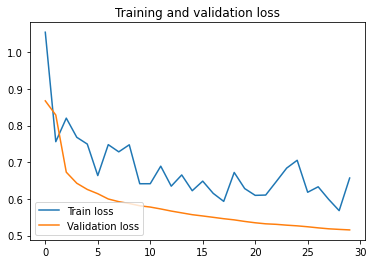

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(60, activation='relu'),
  layers.Dense(30, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(1)
])

model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.7981


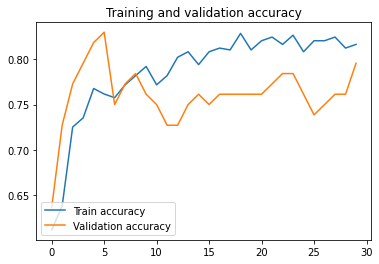

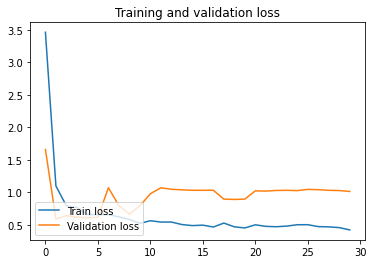

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(60, activation='relu'),
  layers.Dense(30, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=30, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

# Schedules

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 4ms/step - loss: 0.8525 - accuracy: 0.7692


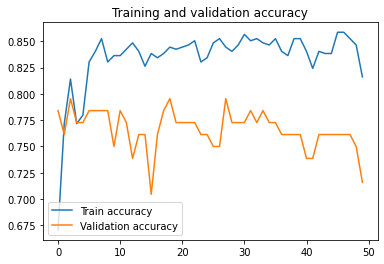

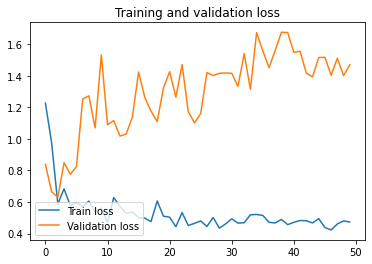

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(60, activation='relu'),
  layers.Dense(30, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(1)
])

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.9,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=50, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 0s 5ms/step - loss: 1.0357 - accuracy: 0.8077


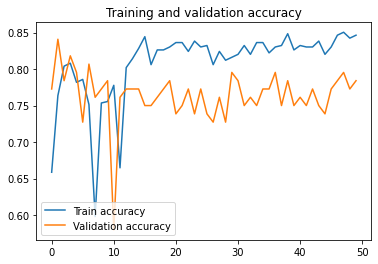

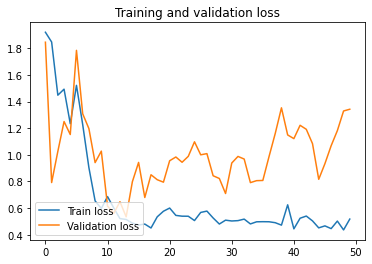

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  layers.Dense(60, activation='relu'),
  layers.Dense(30, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(1)
])

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=50, verbose=0)

model.evaluate(test_ds)
plot_accuracy_loss_graph(history)